In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')



#### The case when there is one numeric explanatory variable and one categorical explanatory variable is sometimes called a "parallel slopes" linear regression due to the shape of the predictions

In [2]:
df_real_state = pd.read_csv('data/taiwan_real_estate2.csv')
df_real_state.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


### Code book

| Column Name | Meaning |
| ---------- | ----------------------|
| dist_to_mrt_m |  Distance to nearest MRT metro station, in meters. |
| n_convenience | Number of of convenience stores in walking distance. | 
| price_twd_msq | House price per unit area, in New Taiwan dollars per meter squared.|

#### Finding the **intercept and slope Between price_twd_msq and n_convenience**.

In [3]:
# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=df_real_state ).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### We can see:
#### For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.
#### For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.

In [4]:
# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=df_real_state).fit()
print(mdl_price_vs_age.params, '\n')


house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64 



#### When Only using ```Categorical``` Values to modeling use 0 . **Not to include ```intercept```.**

In [5]:
# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both =  ols("price_twd_msq ~ n_convenience + house_age_years + 0", data=df_real_state).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


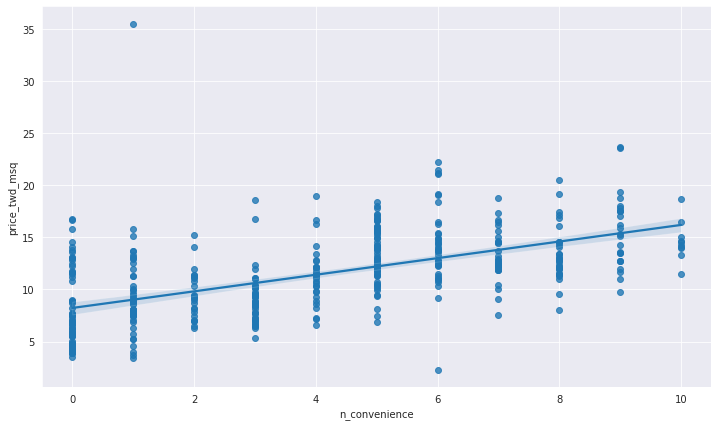

In [6]:
fig =plt.figure(figsize=(12, 7))
# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',y='price_twd_msq', data=df_real_state)

# Show the plot
plt.show()


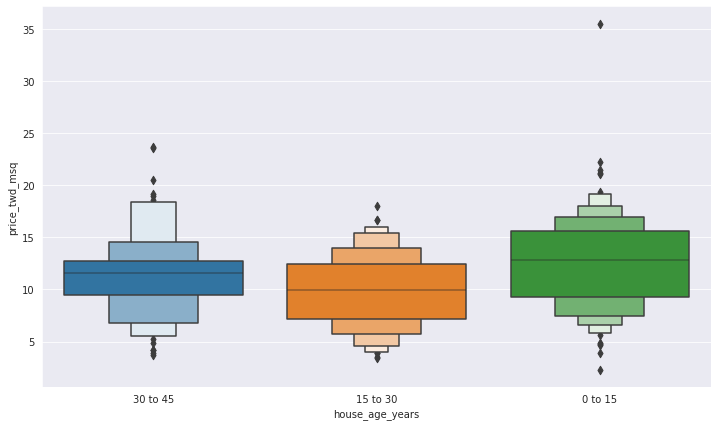

In [7]:
fig =plt.figure(figsize=(12, 7))
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxenplot(x='house_age_years',y='price_twd_msq', data=df_real_state)
plt.show()


In [8]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


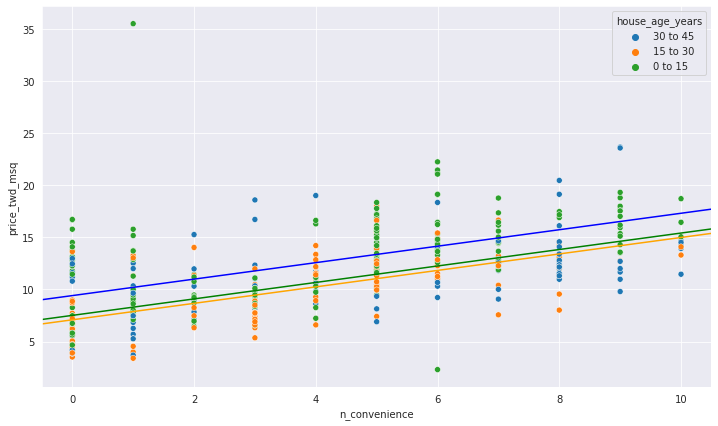

In [9]:
fig =plt.figure(figsize=(12, 7))

# Draw a scatter plot of price_twd_msq vs. n_convenience colored by house_age_years
sns.scatterplot(x='n_convenience', y='price_twd_msq', hue='house_age_years', data=df_real_state)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()
# Show the plot
plt.show()

- #### The ```plt.axline()``` function takes three arguments in this exercise: ```xy1```, ```slope```, and ```color```.
- #### ```xy1``` is a point for the line to pass through, and takes the form of
- #### For each line, the x-coordinate in ```xy1``` is```0```, and the y-coordinate should be the intercept(In this case ```ic_0_15``` or others) for that category.

In [10]:
df_fish = pd.read_csv('data/fish.csv')
df_fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


### Finding the Parameter and Assigning to Intercept and Slope

In [112]:
# Fit a linear regression of species and length_cm to mass_g
length_vs_mass = ols("mass_g ~ length_cm", data=df_fish ).fit()

# Print the coefficients
print(length_vs_mass.params)


Intercept   -536.223947
length_cm     34.899245
dtype: float64


### Creating Dataset

In [113]:
from itertools import product

length_fish = np.arange(5, 61, 5)
length_fish

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

In [114]:
species = df_fish['species'].unique()
species

array(['Bream', 'Roach', 'Perch', 'Pike'], dtype=object)

In [115]:
product_of_species = product(species, length_fish)
product_of_species = [i for i in product_of_species]

In [132]:
extend_df_fish = pd.DataFrame(product_of_species, columns=['species','length_cm'])
extend_df_fish.head()

,species,length_cm
0,Bream,5
1,Bream,10
2,Bream,15
3,Bream,20
4,Bream,25


In [131]:
extend_df_length = extend_df_fish['length_cm']
extend_df_length

0      5
1     10
2     15
3     20
4     25
5     30
6     35
7     40
8     45
9     50
10    55
11    60
12     5
13    10
14    15
15    20
16    25
17    30
18    35
19    40
20    45
21    50
22    55
23    60
24     5
25    10
26    15
27    20
28    25
29    30
30    35
31    40
32    45
33    50
34    55
35    60
36     5
37    10
38    15
39    20
40    25
41    30
42    35
43    40
44    45
45    50
46    55
47    60
Name: length_cm, dtype: int64

In [133]:
# Fit a linear regression of (species and length_cm) to mass_g
both_species_and_length_vs_mass_g = ols("mass_g ~ length_cm + species + 0 ", data = df_fish).fit()
both_species_and_length_vs_mass_g.params

species[Bream]    -672.241866
species[Perch]    -713.292859
species[Pike]    -1089.456053
species[Roach]    -726.777799
length_cm           42.568554
dtype: float64

In [135]:
predictions_of_length = extend_df_fish.assign(mass_g = both_species_and_length_vs_mass_g.predict(extend_df_fish))
predictions_of_length

,species,length_cm,mass_g
0,Bream,5,-459.399096
1,Bream,10,-246.556325
2,Bream,15,-33.713555
3,Bream,20,179.129216
4,Bream,25,391.971986
5,Bream,30,604.814756
6,Bream,35,817.657527
7,Bream,40,1030.500297
8,Bream,45,1243.343067
9,Bream,50,1456.185838


### Calculating Intercept and Slope for both ```length_fish``` and ```species```

In [136]:
# Fit a linear regression of (species and length_cm) to mass_g
species_length_vs_mass_both = ols("mass_g ~ length_cm + species + 0", data=df_fish).fit()

# Print the coefficients
print(species_length_vs_mass_both.params)
it_br, it_pe, it_pi, it_ro, slope = species_length_vs_mass_both.params

species[Bream]    -672.241866
species[Perch]    -713.292859
species[Pike]    -1089.456053
species[Roach]    -726.777799
length_cm           42.568554
dtype: float64


### Visualizing the Prediction vs Actual Data

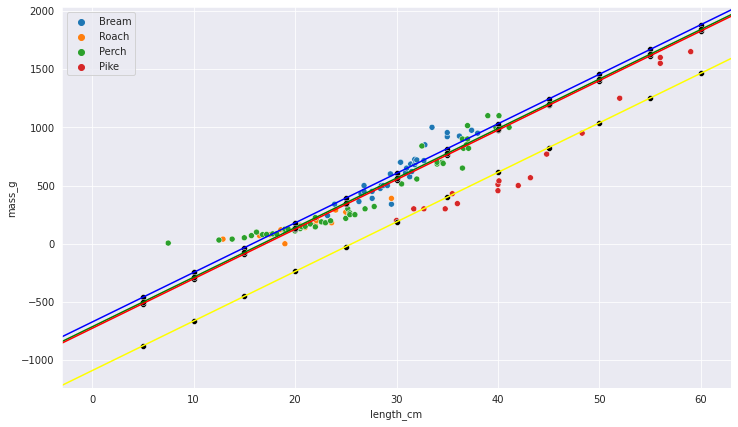

In [137]:
fig =plt.figure(figsize=(12, 7))

sns.scatterplot(x='length_cm',
                y='mass_g',
                hue='species',
                data=df_fish)
sns.scatterplot(x='length_cm',
                y='mass_g',
                color='black',
                data=predictions_of_length)

plt.axline(xy1=(0, it_br), slope=slope, color='blue')
plt.axline(xy1=(0, it_pe), slope=slope, color='green')
plt.axline(xy1=(0, it_pi), slope=slope, color='yellow')
plt.axline(xy1=(0, it_ro), slope=slope, color='red')
plt.show()

In [138]:
conditions = [
    predictions_of_length['species'] == 'Bream',
    predictions_of_length['species'] == 'Perch',
    predictions_of_length['species'] == 'Pike',
    predictions_of_length['species'] == 'Roach'
]
choices = [it_br, it_pe, it_pi, it_ro]

In [139]:
intercept = np.select(conditions, choices)

In [140]:
predictions_of_length_scores = extend_df_fish.assign(
    intercept = np.select(conditions, choices),
    mass_g = intercept + slope * extend_df_fish['length_cm']
)
predictions_of_length_scores.head()

,species,length_cm,intercept,mass_g
0,Bream,5,-672.241866,-459.399096
1,Bream,10,-672.241866,-246.556325
2,Bream,15,-672.241866,-33.713555
3,Bream,20,-672.241866,179.129216
4,Bream,25,-672.241866,391.971986


### Verification the Score

In [164]:
predictions_of_length.head()

,species,length_cm,mass_g
0,Bream,5,-459.399096
1,Bream,10,-246.556325
2,Bream,15,-33.713555
3,Bream,20,179.129216
4,Bream,25,391.971986


#### The coefficient of determination, sometimes known as the ```R-squared value```, measures how good the regression's prediction line fits the observed values, and **a larger number is better**```(between 0-1)```. 
#### The residual standard error, sometimes abbreviated as ```RSE```, is - loosely speaking - the typical size of the residuals. **The smaller the better.** 

#### A variant metric called adjusted coefficient of determination includes a small penalty term for each additional explanatory variable to compensate for this effect. **Its a better metric than the plain coefficient of determination.** The ```penalty is big enough to worry about if the plain coefficient of determination is small```, or if the number of explanatory variables is a sizable fraction of the number of observations. To

#### a lower RSE was achieved, indicating a smaller difference between the predicted responses and the actual responses.